# Pymaceuticals Inc.
---

### Analysis

- After reviewing the data, we can make the following observations:
    
    Capomulin and Ramicane appear to be the most effective at reducing average tumor size. Both treatments stand out noticeably against the other test groups.

    Compared to the Placebo, the other treatments (besides Capomulin and Ramicane) did not appear to make the tumors change substantially one way or the other.
    
    Larger mice appear to have proportionally larger tumors. Despite the variance, this weight did not seem to change the effectiveness of the treatments.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset, merge on Mouse ID?
combo_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview, full df has 1893 rows
combo_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice.
mouse_count = combo_df.nunique(axis=0)
print(mouse_count)
# 249 mice!

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64


In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combo_df[combo_df.duplicated(["Mouse ID","Timepoint"], keep=False)]
duplicate_df
# g989 is the only one that shows up

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
combo_df.loc[combo_df["Mouse ID"] == "g989"]
# total of 13 rows with the g989 duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combo_df.drop(combo_df[combo_df["Mouse ID"] == "g989"].index, inplace = True)
clean_df = combo_df
clean_df
# combo_df had 1893 rows, clean_df has 1880, all 13 g989 entries are removed!

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [32]:
# Checking the number of mice in the clean DataFrame.
second_mouse_count = clean_df.nunique(axis=0)
print(second_mouse_count)
# 248 mice!

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64


In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following procaprties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std_dev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_std_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_summary = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                             "Median Tumor Volume": tumor_median,
                             "Tumor Volume Variance": tumor_variance,
                             "Tumor Volume Std. Dev.": tumor_std_dev,
                             "Tumor Volume Std. Err.": tumor_std_sem})
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


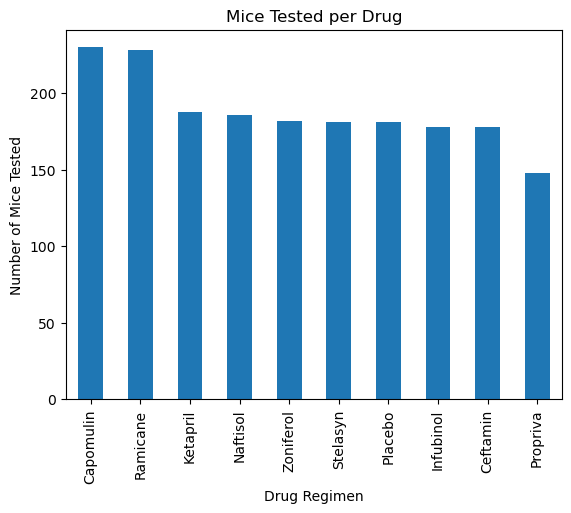

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Module says to use the df.plot() function
drug_counts = clean_df["Drug Regimen"].value_counts()
drug_counts.plot(kind="bar")
# Label some things
plt.title("Mice Tested per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

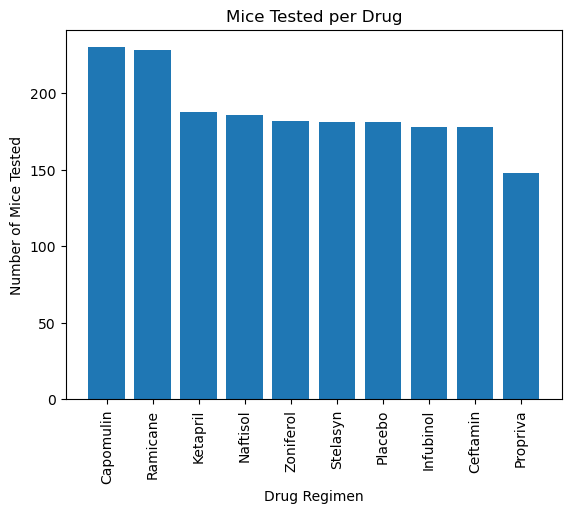

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Module says to use the plt.bar() function
plt.bar(drug_counts.index.values,drug_counts.values)
# Label things again
plt.title("Mice Tested per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x1ce69c35b90>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '50.96%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.04%')])

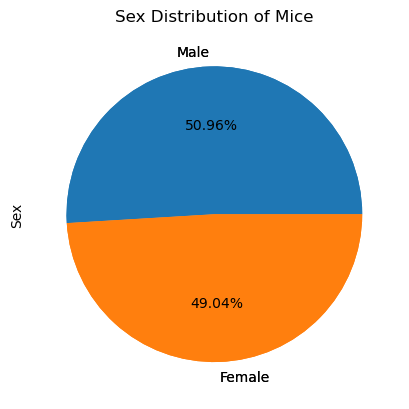

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Module says to use the df.plot() function
sex_counts = clean_df["Sex"].value_counts()
sex_counts.plot(kind="pie")
# Label some things
plt.title("Sex Distribution of Mice")
sex_labels = ["Male", "Female"]
plt.xlabel("")
plt.ylabel("Sex")
plt.pie(sex_counts, labels = sex_labels, autopct="%1.2f%%")

([<matplotlib.patches.Wedge at 0x1ce6a6dd290>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '50.96%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.04%')])

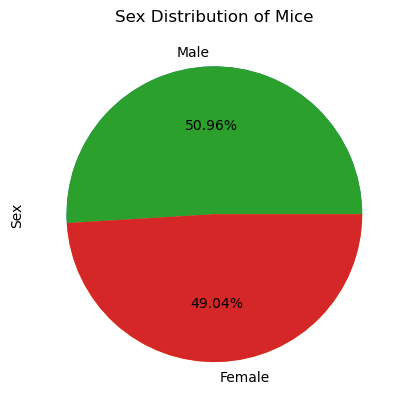

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Module says to use the plt.pie() function
plt.pie(sex_counts)
# Label things again
plt.title("Sex Distribution of Mice")
plt.xlabel("")
plt.ylabel("Sex")
plt.pie(sex_counts, labels = sex_labels, autopct="%1.2f%%")

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_df = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor_df = max_tumor_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor_df = max_tumor_df.merge(clean_df,on=["Mouse ID","Timepoint"],how="left")
merged_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_a = merged_tumor_df.loc[(merged_tumor_df["Drug Regimen"] == "Capomulin"), "Tumor Volume (mm3)"]
treatment_b = merged_tumor_df.loc[(merged_tumor_df["Drug Regimen"] == "Ramicane"), "Tumor Volume (mm3)"]
treatment_c = merged_tumor_df.loc[(merged_tumor_df["Drug Regimen"] == "Infubinol"), "Tumor Volume (mm3)"]
treatment_d = merged_tumor_df.loc[(merged_tumor_df["Drug Regimen"] == "Ceftamin"), "Tumor Volume (mm3)"]
treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatment_list = []
treatment_list.append(treatment_a)
treatment_list.append(treatment_b)
treatment_list.append(treatment_c)
treatment_list.append(treatment_d)

# Create empty list to fill with tumor volume outliers
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_names:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_df = merged_tumor_df.loc[merged_tumor_df["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_list.append(final_tumor_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_df.loc[(final_tumor_df < lower_bound) | (final_tumor_df > upper_bound)]
    print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


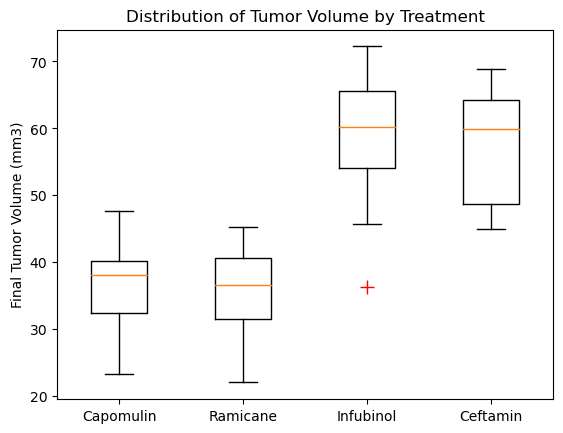

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(treatment_list, labels = treatment_names, sym="red",
            flierprops={"marker": "+", "markersize": 10})
plt.title("Distribution of Tumor Volume by Treatment")
plt.xlabel("")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

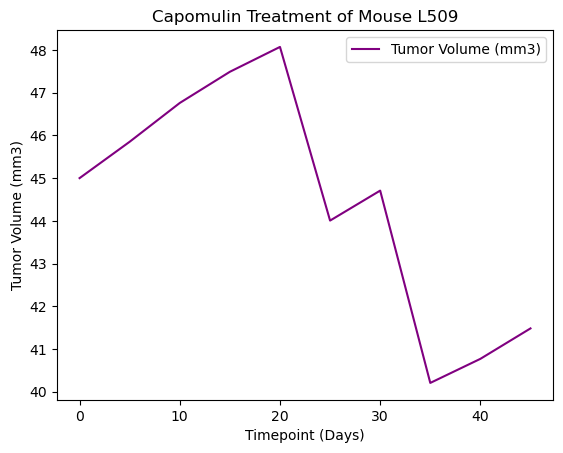

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
capo_mouse_df = capomulin_df.loc[(capomulin_df["Mouse ID"] == "l509")]
capo_mouse_df.plot.line(x="Timepoint", y="Tumor Volume (mm3)", color="purple")
plt.title("Capomulin Treatment of Mouse L509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

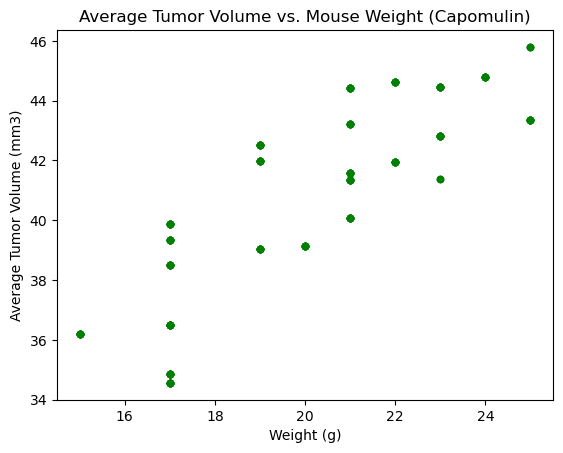

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Get those averages
average_tumor_df = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
average_tumor_df = average_tumor_df.reset_index()

# Merge to get the weight data
tumor_weight_df = pd.merge(average_tumor_df, clean_df[["Mouse ID", "Weight (g)"]], on="Mouse ID", how="left")

# Plot it
tumor_weight_df.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", color="green")
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor volume for Capomulin is 0.8344


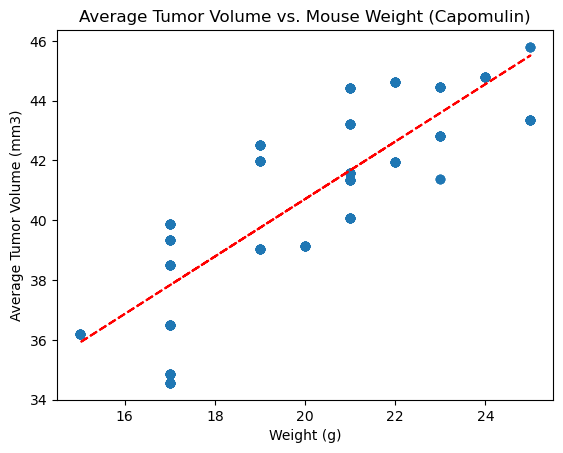

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tumor_column = tumor_weight_df["Tumor Volume (mm3)"]
weight_column = tumor_weight_df["Weight (g)"]
print("The correlation between mouse weight and the average tumor volume for Capomulin is", round(st.pearsonr(weight_column,tumor_column)[0],5))

# Plot it again
capo_slope, capo_int, capo_r, capo_p, capo_std_err = st.linregress(weight_column, tumor_column)
capo_fit = capo_slope * weight_column + capo_int
plt.scatter(weight_column, tumor_column)
plt.plot(weight_column, capo_fit, "--", color="red")
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()